In [36]:
# Import required libraries for KMeans and KMedoids clustering
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
# Load dataset
data = pd.read_csv('credit_card.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<h3 style="color:orange;background-color:black"> Drop CUST_ID since its of type Object/String</h3>
<p style="color:green;background-color:black">K-Means & K-Mediod requires it to be in numerical form.</p>


In [38]:
data.drop('CUST_ID', axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

<h3 style="color:orange;background-color:black">Standarize the data | A requirement of implementing K-Means\K-Mediods</h3>
<p style="color:green;background-color:black">by removing the mean and scaling to unit variance</p>
<p style="color:green;background-color:black">also by imputing missing values | if there are any</p>


In [39]:
standardData = StandardScaler().fit_transform(data)
standardData = SimpleImputer(strategy='mean').fit_transform(standardData)
# If infite values are present in the data, replace them with 0
standardData[np.isinf(standardData)] = 0

pd.DataFrame(standardData).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.195651e-16,1.209548e-14,-9.278518e-16,3.916048e-15,2.275424e-15,5.697020e-15,-3.716084e-16,2.021052e-15,2.353921e-16,5.856519e-16,-7.151821e-16,-3.570713e-15,-7.896601e-16,-3.264056e-16,-7.409963e-17,-2.199184e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000000e+00,1.000056e+00,9.824132e-01,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.917959e-01,-1.221468e+00,-5.986883e-01,-3.642811e-01,-5.255510e-01,-4.122768e+00
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-3.569340e-01,-4.545762e-01,-4.667856e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.753489e-01,-4.760698e-01,-5.515646e-01,-7.954817e-01,-4.662913e-01,-2.922675e-01,-5.255510e-01,3.606795e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,-3.340396e-01,-3.561562e-01,-4.667856e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.753489e-01,-4.760698e-01,-3.101767e-01,-4.107196e-01,-3.026846e-01,-2.228117e-01,-5.255510e-01,3.606795e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,-9.056763e-03,6.366321e-02,6.435242e-02,1.062211e+00,3.269728e-01,9.701506e-01,4.351492e-01,1.100739e-01,9.213645e-02,5.511855e-01,5.802976e-02,-2.797088e-17,-3.712234e-02,3.606795e-01
max,8.397489e+00,5.180838e-01,2.248351e+01,2.420107e+01,2.442689e+01,2.201112e+01,1.269843e+00,2.673451e+00,1.599199e+00,6.820521e+00,1.754785e+01,1.381101e+01,7.009692e+00,1.692228e+01,3.184323e+01,2.893453e+00,3.606795e-01


<h3 style="color:orange;background-color:black">Visualize the standerised data - Ready for K-means/K-mediods</h3>


<h3 style="color:green;background-color:black;"><b>Before</b></h3>


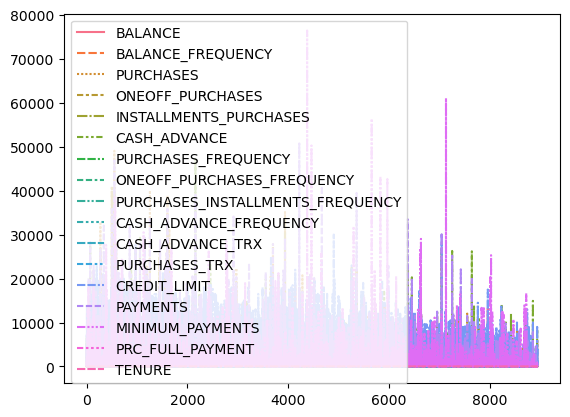

In [40]:
sns.lineplot(data=data, errorbar='sd')
plt.show()

<h3 style="color:green;background-color:black;"><b>After</b></h3>


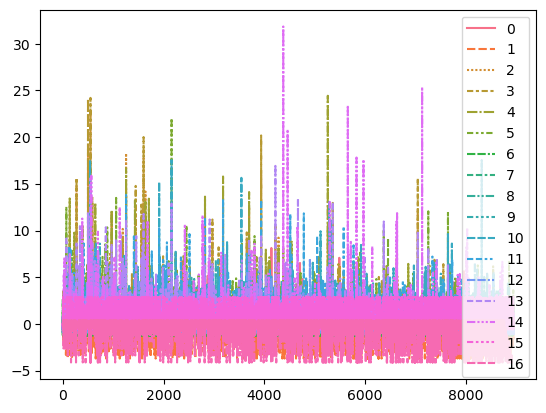

In [41]:
sns.lineplot(data=pd.DataFrame(standardData), errorbar='sd')
plt.show()

<h3 style="color:orange;background-color:black">We can see the standarised data has only Numerical values. And data is standerised on the -5 to 30</h3>


<h3 style="color:orange;background-color:black">Check for optimality</h3>
<h3 style="color:green;background-color:black;"><b>K-Means</b></h3>


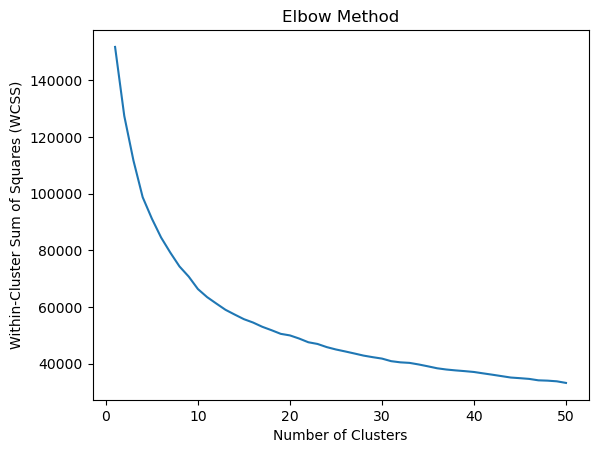

The optimal number of clusters is: 2


In [54]:
# Set the maximum number of clusters to consider
max_k = 50

# Compute the within-cluster sum of squares (WCSS) for each value of k
wcss = []
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    meansModel = kmeans.fit(standardData)
    wcss.append(meansModel.inertia_)

plt.plot(range(1, max_k+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Find the optimal number of clusters based on the elbow method
diffs = []
for i in range(1, len(wcss)-1):
    diff = wcss[i] - wcss[i+1]
    diffs.append(diff)
optimal_k = diffs.index(max(diffs)) + 2  # add 2 to adjust for the loop starting at k=1

print("The optimal number of clusters is:", optimal_k)

<h3 style="color:green;background-color:black;"><b>K-Mediods</b></h3>


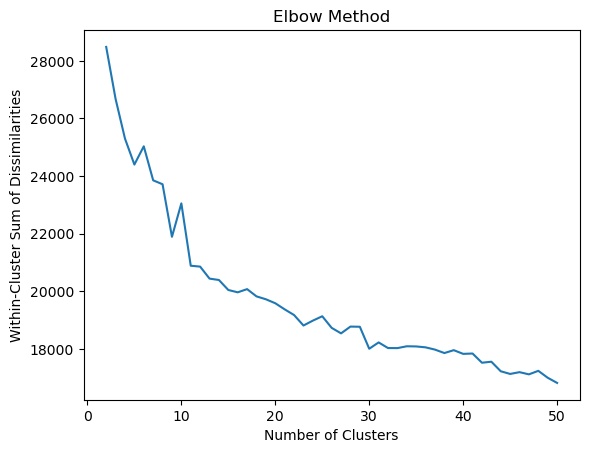

The optimal number of clusters is: 28


In [55]:
# Set the maximum number of clusters to consider
max_k = 50

# Compute the within-cluster sum of dissimilarities for each value of k
wcss = []
for k in range(2, max_k+1):
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    mediodModel=kmedoids.fit(standardData)
    wcss.append(mediodModel.inertia_)

# Plot the within-cluster sum of dissimilarities vs the number of clusters
plt.plot(range(2, max_k+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Dissimilarities')
plt.show()

# Find the optimal number of clusters based on the elbow method
diffs = np.diff(wcss)
diffs_ratio = diffs[1:] / diffs[:-1]
optimal_k = np.argmax(diffs_ratio) + 2  # add 2 to adjust for the loop starting at k=2

print("The optimal number of clusters is:", optimal_k)

<h3 style="color:green;background-color:black">Lets train K-Means\K-Mediods</h3>


In [56]:
kMeans = KMeans(n_clusters=2,
               init='k-means++',
               n_init=10,
               max_iter=500,
               tol=0.0001,
               verbose=0,
               random_state=42,
               copy_x=True,
               algorithm='lloyd')

kMedoids = KMedoids(n_clusters=28, 
                       metric='euclidean', 
                       method='alternate', 
                       init='heuristic', 
                       max_iter=500, 
                       random_state=None)


mediodModel = kMedoids.fit(standardData)
meansModel = kMeans.fit(standardData)

print("KMeans Inertia: ", meansModel.inertia_)
print("KMedoids Inertia: ", mediodModel.inertia_)

KMeans Inertia:  127470.89631201135
KMedoids Inertia:  18771.320632840347


<h3 style="color:orange;background-color:black">Visualize Clusters</h3>
<h3 style="color:green;background-color:black;"><b>K-Means</b></h3>



Count in each cluster: 
 0    5223
1    3727
Name: cluster, dtype: int64


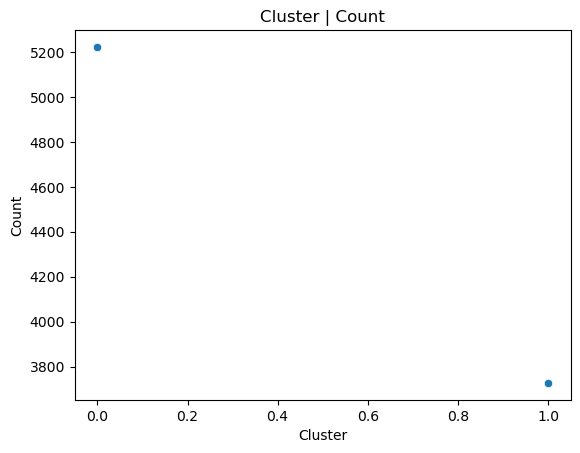

In [67]:
pred = meansModel.predict(standardData)
df = pd.DataFrame(standardData)
df['cluster'] = pred
print('\nCount in each cluster: \n', df['cluster'].value_counts())

sns.scatterplot(df['cluster'].value_counts(),marker='o')
plt.title('Cluster | Count')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


<h3 style="color:green;background-color:black;"><b>K-Mediods</b></h3>



Count in each cluster: 
 7     686
5     638
2     555
14    532
22    474
24    423
21    417
26    384
15    369
6     368
25    355
4     351
17    349
12    345
16    311
10    292
20    284
23    277
8     245
13    204
27    179
3     164
19    155
0     153
18    149
11    123
1     111
9      57
Name: cluster, dtype: int64


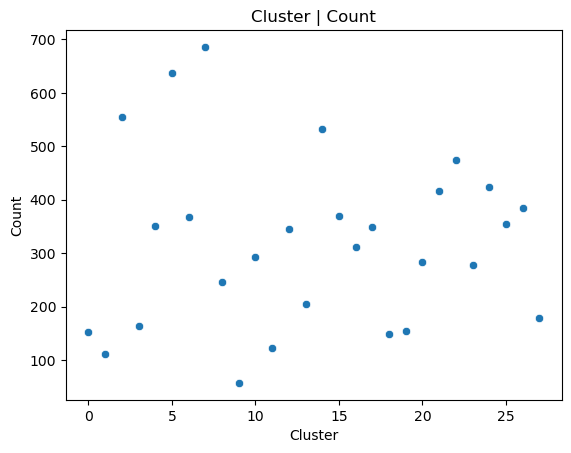

In [66]:

pred = mediodModel.predict(standardData)

df = pd.DataFrame(standardData)
df['cluster'] = pred

print('\nCount in each cluster: \n', df['cluster'].value_counts())
sns.scatterplot(df['cluster'].value_counts(),marker='o')
plt.title('Cluster | Count')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()